<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Khanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import zipfile
import os
import re
import numpy as np
from PIL import Image
import cv2
from numpy import asarray
import matplotlib.pyplot as plt
import math

# Read data

In [32]:
def UyXma(arr):
  uy=sum(arr)/len(arr)
  temp=(uy-arr)**2
  t=sum(temp)
  xma=math.sqrt(t*(1/len(arr)))
  return uy,xma
def array_selection(index,H_channel):
  array = np.array([])
  if index == 0 : array=H_channel[(H_channel>0) & (H_channel<=21)]
  elif index == 1:  array=H_channel[(H_channel>150) & (H_channel<=180)]
  elif index==2: array = H_channel[(H_channel>110) & (H_channel<=140)]
  elif index==3: array = H_channel[(H_channel>30) & (H_channel<=50)]
  elif index==4: array = H_channel[(H_channel>16) & (H_channel<=25)]
  elif index==5: array = H_channel[(H_channel>35) & (H_channel<=40)]
  elif index==6: array = H_channel[(H_channel>38) & (H_channel<=55)]
  else: array = H_channel[H_channel>100]
  return array
def Read_data(path_to_zip_file):
  imgzip = zipfile.ZipFile(path_to_zip_file)
  inflist = imgzip.infolist()
  Array = [[],
           [],
           [],
           [],
           [],
           [],
           [],
           []]
  for f in inflist:
       print(f)
       #Đọc ảnh -> array
       ifile = imgzip.open(f)
       image = asarray(Image.open(ifile))   
       #convert RGB -> HSV
       hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
       #select H channel
       H_channel = hsv[:,:,0] 
       #Select fruit's pixel
       fruit = re.search('/(.*)/',f.filename).group(1)
       index = np.where(fruits==fruit)[0][0] 
       array = array_selection(index,H_channel)
       #Add array to Array with corresponding index
       Array[index].extend(array)
  return Array
def Predict(image_path,Uyxma_list):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    plt.imshow(image)
    plt.show()
    h_channel = image[:,:,0]
    nums,index = 0,0
    for i in range(0,len(Uyxma_list)):
       Uy,xma = Uyxma_list[i][0],Uyxma_list[i][1]
       min,max = Uy-2*xma, Uy+2*xma
       temp = np.sum((h_channel>=min)&(h_channel<=max))
       if nums < temp: 
         nums = temp
         index = i
    print('Loai trai cay la:',fruits[index])

In [33]:
fruits = np.array(['Orange','Apple','Grape','Watermelon','Banana','Mango','Lemon','Strawberry'])
path_to_zip_file = '/content/drive/MyDrive/Data Khanh/Khanh.zip'
Array = Read_data(path_to_zip_file)
Uyxma_list = np.zeros((8,2))
for index,lst in enumerate(Array):
    Uyxma_list[index][0],Uyxma_list[index][1] = UyXma(lst)
print(Uyxma_list)

<ZipInfo filename='Fruit Image/Orange/023.jpg' compress_type=deflate file_size=69739 compress_size=69754>
<ZipInfo filename='Fruit Image/Grape/015.jpg' compress_type=deflate file_size=61550 compress_size=61560>
<ZipInfo filename='Fruit Image/Grape/014.jpg' compress_type=deflate file_size=61550 compress_size=61560>
<ZipInfo filename='Fruit Image/Orange/09.jpg' compress_type=deflate file_size=56017 compress_size=56027>
<ZipInfo filename='Fruit Image/Orange/08.jpg' compress_type=deflate file_size=471840 compress_size=471915>
<ZipInfo filename='Fruit Image/Apple/034.jpg' compress_type=deflate file_size=26254 compress_size=26259>
<ZipInfo filename='Fruit Image/Watermelon/020.jpg' compress_type=deflate file_size=62757 compress_size=62767>
<ZipInfo filename='Fruit Image/Watermelon/022.jpg' compress_type=deflate file_size=8569 compress_size=8574>
<ZipInfo filename='Fruit Image/Banana/01.jpg' compress_type=deflate file_size=26854 compress_size=26859>
<ZipInfo filename='Fruit Image/Grape/013.jpg

In [34]:
a = np.random.rand(4,1)

In [35]:
print(a)

[[0.67754647]
 [0.48766029]
 [0.61736261]
 [0.24482341]]


In [36]:
uy_a,xma_a = UyXma(a)
print(uy_a,xma_a)

[0.5068482] 0.16611479577982136


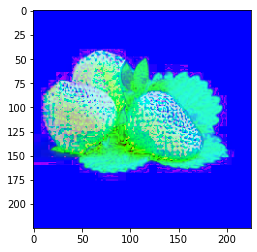

Loai trai cay la: Watermelon


In [38]:
image_path = '/content/188939028_4423533864346505_39531946717396922_n.jpg'
Predict(image_path,Uyxma_list)